<a href="https://colab.research.google.com/github/guidsantos/analyzeCovidTotalCases/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import bs4 as bs
import requests as req

In [300]:
import pandas as pd
import numpy as np

In [393]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [302]:
pagHtml = req.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory#void").text

In [303]:
soup = bs.BeautifulSoup(pagHtml, 'html5lib')

In [304]:
table = soup.find("div", id="covid-19-pandemic-data")

In [305]:
trs = table.findAll('tr')
trsValues = []
trs[2].get_text()

'\n\n\nUnited States[f]\n\n33,017,234\n\n589,984\n\nNo data\n\n[16]\n'

In [306]:
trsValues = []
for tr in trs:
    trText = tr.get_text()
    trText = trText.replace(',', '.')
    trText2 = trText.replace('\n\n\n', '')  
    trText3 = trText2.replace('\n\n', ',')
    trText4 = trText3.replace('\n', '')
    trText5 = trText4.replace(trText4[trText4.find("["):trText4.find("]")+1], '').strip()
    trTextList = trText5.split(',') 
    trsValues.append(trTextList)

location = []
cases = []
deaths = []
recov = []

for x in range(len(trsValues)-3):
   location.append(trsValues[x+1][0])
   cases.append(trsValues[x+1][1])
   deaths.append(trsValues[x+1][2])
   recov.append(trsValues[x+1][3])

In [307]:
casesDF = pd.DataFrame(np.column_stack([location, cases, deaths,recov ]), 
                               columns=['Location', 'Cases', 'Deaths', 'Recovery'])

In [308]:
casesDF.head(10)

,Location,Cases,Deaths,Recovery
0,World,160.743.894,3.338.355,No data
1,United States,33.017.234,589.984,No data
2,India,23.703.665,258.317,19.734.823
3,Brazil,15.361.686,428.256,13.924.217
4,France,5.800.170,106.935,No data
5,Turkey,5.083.996,44.059,4.856.763
6,Russia,4.913.439,114.723,4.527.878
7,United Kingdom,4.444.631,127.651,No data
8,Italy,4.131.078,123.544,3.655.112
9,Spain,3.592.751,79.205,No data


In [309]:
casesDF.describe()

,Location,Cases,Deaths,Recovery
count,240,240,240,240
unique,240,234,195,215
top,Saint Pierre and Miquelon,4,0,No data
freq,1,4,22,22


In [310]:
def filterDf(dataFrame, column, values):
    return dataFrame.loc[dataFrame[column].isin(values)]

In [311]:
locations_filter = ['Brazil','World', 'India', 'Russia', 'Turkey', 'United States', 'United Kingdom', 'France', 'Italy', 'Spain', 'Canada' ]

casesDfFiltered = filterDf(casesDF, 'Location', locations_filter)

In [312]:
casesDfFiltered

,Location,Cases,Deaths,Recovery
0,World,160.743.894,3.338.355,No data
1,United States,33.017.234,589.984,No data
2,India,23.703.665,258.317,19.734.823
3,Brazil,15.361.686,428.256,13.924.217
4,France,5.800.170,106.935,No data
5,Turkey,5.083.996,44.059,4.856.763
6,Russia,4.913.439,114.723,4.527.878
7,United Kingdom,4.444.631,127.651,No data
8,Italy,4.131.078,123.544,3.655.112
9,Spain,3.592.751,79.205,No data


In [313]:
def getValuesInColumns(dataFrame, columns):
    values = []
    for column in columns:
        column_values = []
        for value in casesDfFiltered[column]:
            column_values.append(float(value.replace('.','')))
        values.append(column_values)
    return values

In [314]:
columns = ['Deaths', 'Cases']

deathsAndRecovery = getValuesInColumns(casesDfFiltered, columns)

deaths = deathsAndRecovery[0]
cases = deathsAndRecovery[1]
casesInFilteredLocationDf = deathsAndRecovery[1]

In [315]:
deaths

[3338355.0,
 589984.0,
 258317.0,
 428256.0,
 106935.0,
 44059.0,
 114723.0,
 127651.0,
 123544.0,
 79205.0,
 24802.0]

In [316]:
casesDfFiltered.loc[:,'Deaths'] = deaths

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [317]:
casesDfFiltered.loc[:,'Cases'] = cases

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [318]:
lethalities = []
for i in range(len(deaths)):
    death_i = int(deaths[i]) 
    nCases = int(cases[i])
    lethality_i = death_i/nCases
    lethalities.append(lethality_i)
    nCases = '{0:,}'.format(nCases).replace(',','.')

In [319]:
lethalities

[0.020768160562291717,
 0.01786897109551939,
 0.010897766231508925,
 0.02787818993305813,
 0.018436528584507006,
 0.008666214528886333,
 0.02334881943176663,
 0.028720269466689135,
 0.02990599548108266,
 0.02204578051749203,
 0.018942425779173565]

In [320]:
lethalities_round = []
for lethality in lethalities:
    lethality *= 100 
    lethalities_round.append(round(lethality,3))

In [321]:
lethalities_round

[2.077, 1.787, 1.09, 2.788, 1.844, 0.867, 2.335, 2.872, 2.991, 2.205, 1.894]

In [322]:
casesDfFiltered.loc[:,'Lethality'] = lethalities_round

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [323]:
casesDfFiltered

,Location,Cases,Deaths,Recovery,Lethality
0,World,160743894.0,3338355.0,No data,2.077
1,United States,33017234.0,589984.0,No data,1.787
2,India,23703665.0,258317.0,19.734.823,1.090
3,Brazil,15361686.0,428256.0,13.924.217,2.788
4,France,5800170.0,106935.0,No data,1.844
5,Turkey,5083996.0,44059.0,4.856.763,0.867
6,Russia,4913439.0,114723.0,4.527.878,2.335
7,United Kingdom,4444631.0,127651.0,No data,2.872
8,Italy,4131078.0,123544.0,3.655.112,2.991
9,Spain,3592751.0,79205.0,No data,2.205


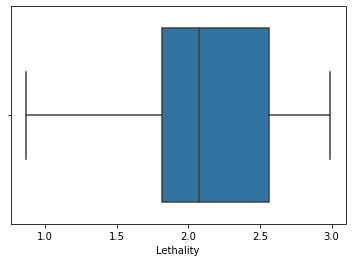

In [324]:
sns.boxplot(data=casesDfFiltered, x='Lethality')

In [325]:
lethalityOrder = sorted(casesDfFiltered['Lethality'])
lethalityOrder

[0.867, 1.09, 1.787, 1.844, 1.894, 2.077, 2.205, 2.335, 2.788, 2.872, 2.991]

In [326]:
casesDfNoWorld = casesDfFiltered.query('Location != "World"')

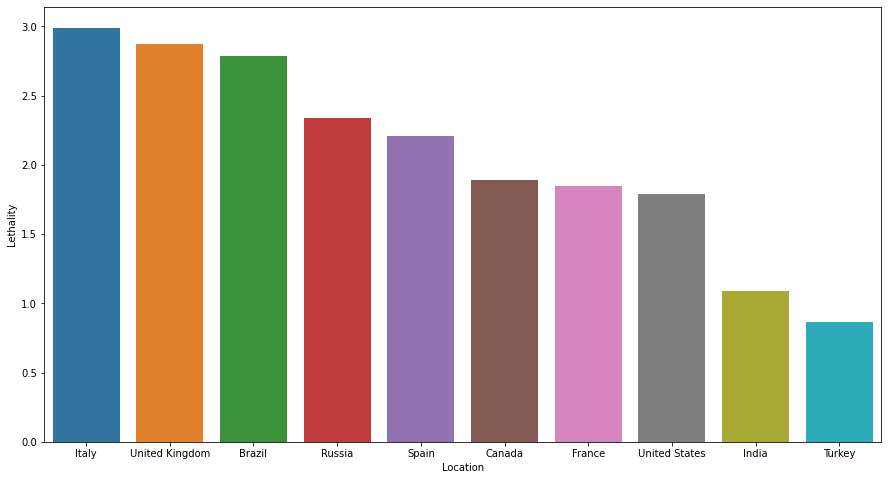

In [327]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location', y='Lethality', data=casesDfNoWorld.sort_values(['Lethality'], ascending=False))

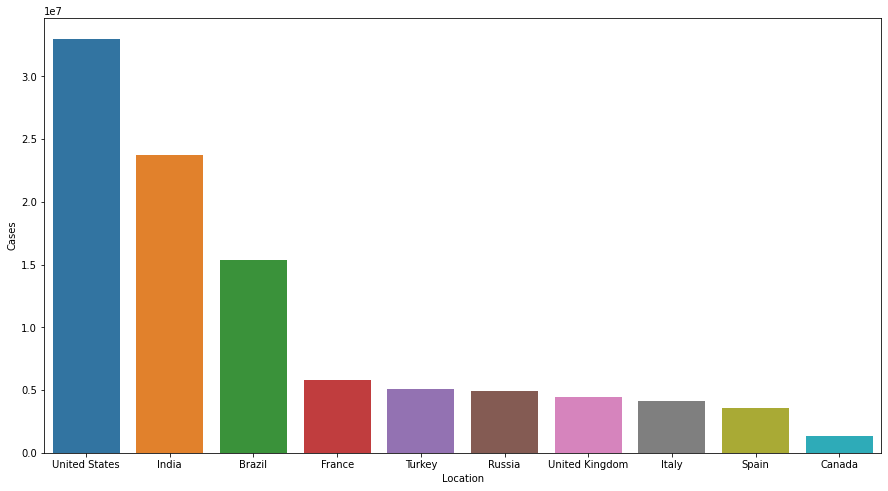

In [328]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location', y='Cases', data=casesDfNoWorld.sort_values(['Cases'], ascending=False))

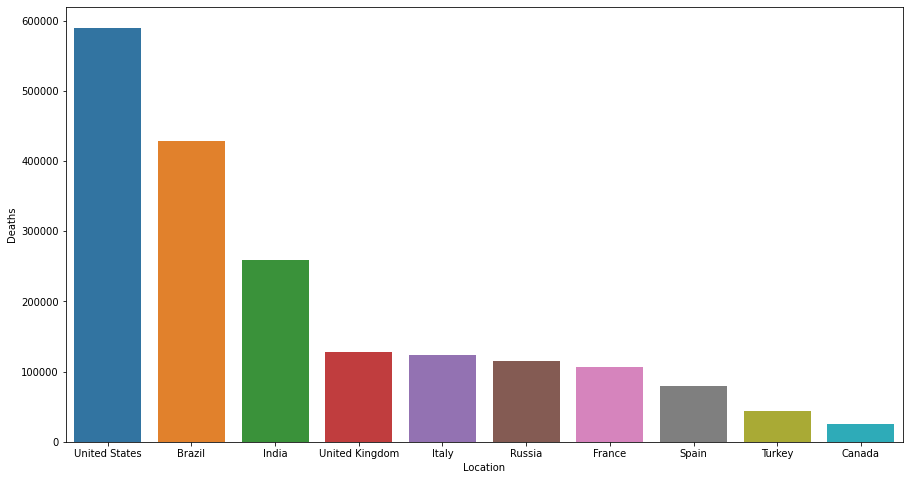

In [329]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location', y='Deaths', data=casesDfNoWorld.sort_values(['Deaths'], ascending=False))

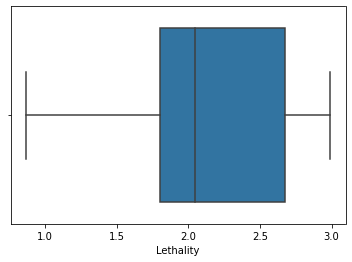

In [330]:
sns.boxplot(data=casesDfNoWorld, x='Lethality')

In [331]:
pagHtml2 = req.get("https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idh-global.html").text

In [332]:
soup2 = bs.BeautifulSoup(pagHtml2, 'html5lib')

In [333]:
idhTable = soup2.find("tbody")

In [362]:
idhs = []
rows = idhTable.findAll('td')

In [363]:
rows.pop(148)

<td colspan="3">ALTO DESENVOLVIMENTO HUMANO</td>

In [364]:
rows.pop(316)

<td colspan="3">MÉDIO DESENVOLVIMENTO HUMANO</td>

In [365]:
rows_filtered = []

In [366]:
x = 0
row_n = 1
row = []
for td in rows[1:]:
    if row_n == 402:
        break
    if row_n != 148 | 316 :
        td_replace = str(td).replace('<td>', '')
        td_replace = td_replace.replace('</td>', '')
        row.append(td_replace)
        if x < 3:
            x += 1
        if x == 3:
            rows_filtered.append(row)
            row = []
            x = 0
    row_n +=1      

In [367]:
rows_filtered[10:20]

[['11', 'Singapura', '0,912'],
 ['12', 'Hong Kong, China (SAR)', '0,910'],
 ['13', 'Liechtenstein', '0,908'],
 ['14', 'Suécia', '0,907'],
 ['14', 'Reino Unido', '0,907'],
 ['16', 'Islândia', '0,899'],
 ['17', 'Coreia (República da)', '0,898'],
 ['18', 'Israel', '0,894'],
 ['19', 'Luxemburgo', '0,892'],
 ['20', 'Japão', '0,891']]

In [385]:
for row in rows_filtered:
  row[2] = float(row[2].replace(',','.'))

In [386]:
idh_table = pd.DataFrame(rows_filtered,
                         columns=['Pos','Pais','IDH'])

In [387]:
idh_table.tail()

,Pos,Pais,IDH
128,129,Tajiquistão,0.624
129,130,Índia,0.609
130,131,Honduras,0.606
131,132,Butão,0.605
132,133,Timor-Leste,0.595


In [388]:
idh_filter = ['Federação Russa','Turquia','Estados Unidos','Reino Unido','França','Itália','Espanha','Canadá','Brasil','Índia']

In [389]:
filtered_countries = filterDf(idh_table,'Pais', idh_filter)

In [390]:
filtered_countries

,Pos,Pais,IDH
7,8,Estados Unidos,0.915
8,9,Canadá,0.913
14,14,Reino Unido,0.907
21,22,França,0.888
25,26,Espanha,0.876
26,27,Itália,0.873
50,50,Federação Russa,0.798
71,72,Turquia,0.761
74,75,Brasil,0.755
129,130,Índia,0.609


In [441]:
lista_idhs = list(filtered_countries.sort_values(['IDH'],ascending=False)['IDH'])
lista_idhs

[0.915, 0.913, 0.907, 0.888, 0.876, 0.873, 0.798, 0.761, 0.755, 0.609]

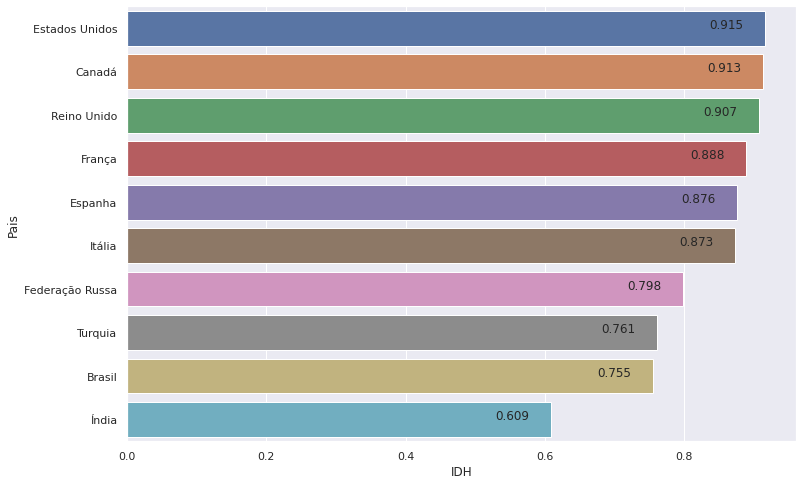

In [454]:
plt.figure(figsize=(12,8))
sns.barplot(y='Pais', x='IDH', data=filtered_countries.sort_values(['IDH'], ascending=False))
for i, v in enumerate(lista_idhs):
     plt.text(v - 0.08, i, str(v), fontsize='medium')